In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
import unicodedata  # Para normalizar nomes
import numpy as np

def normalize_name(name):
    return unicodedata.normalize('NFKD', name.upper()).encode('ascii', 'ignore').decode('utf-8')

In [40]:

caminho_crimes_2024 = r'C:\Users\carol\OneDrive\Documentos\evasaoEscolar\dadosCriminais\SPDadosCriminais_2024.csv'
df_crimes_2024 = pd.read_csv(
    caminho_crimes_2024, 
    sep=';',  
    encoding='utf-8', 
    quotechar='"', 
    doublequote=True,  # Trata aspas duplas
    on_bad_lines='skip',  # Pula linhas malformadas
    engine='python'  # Mais tolerante a erros
)  

#Mostra primeiras linhas e colunas (rode isso pra checar)
print("Primeiras 5 linhas:")
print(df_crimes_2024.head())
print("\nColunas disponíveis:")
print(df_crimes_2024.columns.tolist())
print(f"\nTamanho do DF: {df_crimes_2024.shape[0]} linhas")

df_crimes_2024 = df_crimes_2024[df_crimes_2024['NOME_MUNICIPIO_CIRCUNSCRIÇÃO'] != 'OCULTADO']
df_crimes_2024 = df_crimes_2024[df_crimes_2024['ANO_ESTATISTICA'] == 2024]


df_crimes_2024['MUN_NORM'] = df_crimes_2024['NOME_MUNICIPIO_CIRCUNSCRIÇÃO'].apply(normalize_name)
df_crimes_agg_2024 = df_crimes_2024.groupby('MUN_NORM').size().reset_index(name='crimes_abs_2024')

print(f"Crimes agregados 2024: {len(df_crimes_agg_2024)} municípios")

df_crimes_2024['MUN_NORM'] = df_crimes_2024['NOME_MUNICIPIO_CIRCUNSCRIÇÃO'].apply(normalize_name)
df_crimes_agg_2024 = df_crimes_2024.groupby('MUN_NORM').size().reset_index(name='crimes_abs_2024')

Primeiras 5 linhas:
               NOME_DEPARTAMENTO        NOME_SECCIONAL  \
0                          DECAP     DEL.SEC.1º CENTRO   
1  DIPOL - DEPTO DE INTELIGENCIA  DELEGACIA ELETRONICA   
2                          DECAP      DEL.SEC.4º NORTE   
3  DIPOL - DEPTO DE INTELIGENCIA  DELEGACIA ELETRONICA   
4  DIPOL - DEPTO DE INTELIGENCIA  DELEGACIA ELETRONICA   

           NOME_DELEGACIA NOME_MUNICIPIO  NUM_BO  ANO_BO DATA_REGISTRO  \
0          01ª DDM CENTRO        S.PAULO  AB8192    2024    02/01/2024   
1    DELEGACIA ELETRONICA        S.PAULO  AA0650    2024    01/01/2024   
2     13º D.P. CASA VERDE        S.PAULO  AA1075    2024    01/01/2024   
3  DELEGACIA ELETRONICA 1        S.PAULO  AA1444    2024    01/01/2024   
4    DELEGACIA ELETRONICA        S.PAULO  AA4651    2024    01/01/2024   

  DATA_OCORRENCIA_BO HORA_OCORRENCIA_BO  DESC_PERIODO  ...     LONGITUDE  \
0         28/12/2023           23:55:00           NaN  ...             0   
1         01/01/2024              

In [41]:
caminho_crimes_2023 = r'C:\Users\carol\OneDrive\Documentos\evasaoEscolar\dadosCriminais\SPDadosCriminais_2023.csv'
df_crimes_2023 = pd.read_csv(
    caminho_crimes_2023, 
    sep=';',  
    encoding='utf-8', 
    quotechar='"', 
    doublequote=True,  # Trata aspas duplas
    on_bad_lines='skip',  # Pula linhas malformadas
    engine='python'  # Mais tolerante a erros
)  


print("Primeiras 5 linhas de 2023:")
print(df_crimes_2023.head())
print("\nColunas disponíveis em 2023:")
print(df_crimes_2023.columns.tolist())
print(f"\nTamanho do DF 2023: {df_crimes_2023.shape[0]} linhas")

df_crimes_2023 = df_crimes_2023[df_crimes_2023['NOME_MUNICIPIO_CIRCUNSCRIÇÃO'] != 'OCULTADO']
df_crimes_2023 = df_crimes_2023[df_crimes_2023['ANO_ESTATISTICA'] == 2023]

df_crimes_2023['MUN_NORM'] = df_crimes_2023['NOME_MUNICIPIO_CIRCUNSCRIÇÃO'].apply(normalize_name)
df_crimes_agg_2023 = df_crimes_2023.groupby('MUN_NORM').size().reset_index(name='crimes_abs_2023')

print(f"Crimes agregados 2023: {len(df_crimes_agg_2023)} municípios")

Primeiras 5 linhas de 2023:
               NOME_DEPARTAMENTO        NOME_SECCIONAL        NOME_DELEGACIA  \
0                          DECAP     DEL.SEC.1º CENTRO        01ª DDM CENTRO   
1                          DECAP     DEL.SEC.1º CENTRO        01ª DDM CENTRO   
2  DIPOL - DEPTO DE INTELIGENCIA  DELEGACIA ELETRONICA  DELEGACIA ELETRONICA   
3  DIPOL - DEPTO DE INTELIGENCIA  DELEGACIA ELETRONICA  DELEGACIA ELETRONICA   
4  DIPOL - DEPTO DE INTELIGENCIA  DELEGACIA ELETRONICA  DELEGACIA ELETRONICA   

  NOME_MUNICIPIO  NUM_BO  ANO_BO DATA_REGISTRO DATA_OCORRENCIA_BO  \
0        S.PAULO  AP5096    2023    14/01/2023         12/01/2023   
1        S.PAULO  BD2233    2023    25/01/2023         24/01/2023   
2        S.PAULO  AA0063    2023    31/12/2022         30/12/2022   
3        S.PAULO  AA0404    2023    31/12/2022         30/12/2022   
4        S.PAULO  AA0895    2023    31/12/2022         30/12/2022   

  HORA_OCORRENCIA_BO DESC_PERIODO  ...      LONGITUDE  \
0           21:00:1

In [42]:
caminho_pop = r'C:\Users\carol\OneDrive\Documentos\evasaoEscolar\dadosPopulacao\estimativa_dou_2024.xls'

#Carrega a aba de municípios
sheet_name = 'MUNICÍPIOS'

df_pop = pd.read_excel(caminho_pop, sheet_name=sheet_name, skiprows=2)

#Filtrar só SP e renomear colunas
df_pop.columns = ['UF', 'COD. UF', 'COD. MUNIC', 'NOME DO MUNICÍPIO', 'POPULAÇÃO ESTIMADA'] 

#Filtrar pela sigla 'SP' na coluna 'UF'
df_pop = df_pop[df_pop['UF'] == 'SP'] 
df_pop = df_pop.reset_index(drop=True)

#Renomear para as colunas finais
df_pop.columns = ['UF', 'COD_UF', 'COD_MUN', 'NOME_MUN', 'POP_2024'] 

#Garantir que as colunas são numéricas
df_pop['COD_UF'] = pd.to_numeric(df_pop['COD_UF'], errors='coerce')
df_pop['COD_MUN'] = pd.to_numeric(df_pop['COD_MUN'], errors='coerce')
df_pop['POP_2024'] = pd.to_numeric(df_pop['POP_2024'], errors='coerce')


df_pop['CO_MUNICIPIO'] = df_pop['COD_UF'] * 100000 + df_pop['COD_MUN'] 
df_pop['CO_MUNICIPIO'] = df_pop['CO_MUNICIPIO'].astype(int) 
df_pop['MUN_NORM'] = df_pop['NOME_MUN'].apply(normalize_name)
df_pop = df_pop[['CO_MUNICIPIO', 'MUN_NORM', 'POP_2024']].dropna()

print(f"\nMunicípios SP carregados: {len(df_pop)}")
print("Primeiras 5 linhas finais:")
print(df_pop.head())
print(f"População total SP: {df_pop['POP_2024'].sum():,.0f}")


Municípios SP carregados: 645
Primeiras 5 linhas finais:
   CO_MUNICIPIO          MUN_NORM  POP_2024
0       3500105        ADAMANTINA   35642.0
1       3500204            ADOLFO    4478.0
2       3500303             AGUAI   32888.0
3       3500402    AGUAS DA PRATA    7470.0
4       3500501  AGUAS DE LINDOIA   18245.0
População total SP: 45,973,194


In [43]:
# Merge população com crimes 2024 e calcular taxa
df_crimes_agg_2024 = df_crimes_agg_2024.merge(df_pop, on='MUN_NORM', how='left')
df_crimes_agg_2024['crimes_taxa_2024'] = (df_crimes_agg_2024['crimes_abs_2024'] / df_crimes_agg_2024['POP_2024']) * 100000

In [44]:
df_crimes_agg_2024 = df_crimes_agg_2024[['MUN_NORM', 'crimes_abs_2024']].copy()

df_crimes_agg_2024 = df_crimes_agg_2024.merge(
    df_pop[['MUN_NORM', 'CO_MUNICIPIO', 'POP_2024']], 
    on='MUN_NORM', 
    how='left'
)

df_crimes_agg_2024['CO_MUNICIPIO'] = df_crimes_agg_2024['CO_MUNICIPIO'].astype('Int64')

#Limpeza e Cálculo
df_crimes_agg_2024 = df_crimes_agg_2024.dropna(subset=['POP_2024']) 

df_crimes_agg_2024['crimes_taxa_2024'] = (
    df_crimes_agg_2024['crimes_abs_2024'] / df_crimes_agg_2024['POP_2024']
) * 100000

#Seleciona as colunas finais
df_crimes_agg_2024 = df_crimes_agg_2024[['CO_MUNICIPIO', 'MUN_NORM', 'crimes_abs_2024', 'POP_2024', 'crimes_taxa_2024']]

print(f"Crimes 2024 com Taxa e CO_MUNICIPIO: {len(df_crimes_agg_2024)} municípios")
print(df_crimes_agg_2024.head())

Crimes 2024 com Taxa e CO_MUNICIPIO: 577 municípios
   CO_MUNICIPIO          MUN_NORM  crimes_abs_2024  POP_2024  crimes_taxa_2024
0       3500105        ADAMANTINA              347   35642.0        973.570507
1       3500204            ADOLFO               41    4478.0        915.587316
2       3500303             AGUAI              371   32888.0       1128.071029
3       3500402    AGUAS DA PRATA               62    7470.0        829.986613
4       3500501  AGUAS DE LINDOIA              141   18245.0        772.814470


In [45]:
df_crimes_agg_2023_taxa = df_crimes_agg_2023[['MUN_NORM', 'crimes_abs_2023']].copy()

df_crimes_agg_2023_taxa = df_crimes_agg_2023_taxa.merge(
        df_pop[['MUN_NORM', 'CO_MUNICIPIO', 'POP_2024']], 
        on='MUN_NORM', 
        how='left'
    )

df_crimes_agg_2023_taxa['CO_MUNICIPIO'] = df_crimes_agg_2023_taxa['CO_MUNICIPIO'].astype('Int64')

    #Limpeza e Cálculo
df_crimes_agg_2023_taxa = df_crimes_agg_2023_taxa.dropna(subset=['POP_2024']) # Limpa os municípios que não parearam

    # Cálculo da Taxa de Crimes 2023 por 100 mil habitantes
df_crimes_agg_2023_taxa['crimes_taxa_2023'] = (
        df_crimes_agg_2023_taxa['crimes_abs_2023'] / df_crimes_agg_2023_taxa['POP_2024']
    ) * 100000

    # Seleciona as colunas finais
df_crimes_agg_2023_taxa = df_crimes_agg_2023_taxa[['CO_MUNICIPIO', 'MUN_NORM', 'crimes_taxa_2023']]

print(f"Crimes 2023 com Taxa e CO_MUNICIPIO: {len(df_crimes_agg_2023_taxa)} municípios")
print(df_crimes_agg_2023_taxa.head())

Crimes 2023 com Taxa e CO_MUNICIPIO: 577 municípios
   CO_MUNICIPIO          MUN_NORM  crimes_taxa_2023
0       3500105        ADAMANTINA        830.480893
1       3500204            ADOLFO        759.267530
2       3500303             AGUAI        650.693262
3       3500402    AGUAS DA PRATA        829.986613
4       3500501  AGUAS DE LINDOIA        630.309674


In [46]:
caminho_evasao_2024 = r'C:\Users\carol\OneDrive\Documentos\evasaoEscolar\dadosEvasao\taxas_transicao_2024.xlsx'
sheet_name = 'MUNICIPIOS '  

df_evasao_2024_bruto = pd.read_excel(caminho_evasao_2024, sheet_name=sheet_name, skiprows=5, header=0, usecols=None) 

df_evasao_2024_sp = df_evasao_2024_bruto[
    (df_evasao_2024_bruto.iloc[:, 0] == 2024) &  
    (df_evasao_2024_bruto.iloc[:, 2] == 'SP')    
].copy()

df_evasao_2024_sp.loc[:, 'CO_MUNICIPIO'] = pd.to_numeric(df_evasao_2024_sp.iloc[:, 3], errors='coerce').astype('Int64')

# Usando índice 57 (BF - Abandono Total Ensino Médio)
df_evasao_2024_sp.loc[:, 'evasao_pct_2024'] = pd.to_numeric(df_evasao_2024_sp.iloc[:, 57], errors='coerce') 
df_evasao_2024_sp = df_evasao_2024_sp.dropna(subset=['evasao_pct_2024', 'CO_MUNICIPIO'])


df_evasao_2024_final = df_evasao_2024_sp.groupby('CO_MUNICIPIO')['evasao_pct_2024'].mean().reset_index()
df_evasao_2024_final['CO_MUNICIPIO'] = df_evasao_2024_final['CO_MUNICIPIO'].astype(int)

print(f"\nMunicípios SP com evasão: {len(df_evasao_2024_final)}")
print("Primeiras 5 linhas finais:")
print(df_evasao_2024_final.head())
print(f"Média de evasão em SP: {df_evasao_2024_final['evasao_pct_2024'].mean():.2f}%")


Municípios SP com evasão: 645
Primeiras 5 linhas finais:
   CO_MUNICIPIO  evasao_pct_2024
0       3500105         5.563636
1       3500204         5.300000
2       3500303         4.700000
3       3500402         2.400000
4       3500501         0.400000
Média de evasão em SP: 2.52%


In [47]:
# 7.2. MATRÍCULA TÉCNICA (Variável de Controle - CSV) - VERSÃO DEFINITIVA
caminho_tec = r'C:\Users\carol\OneDrive\Documentos\evasaoEscolar\dadosEvasao\cursos_tecnicos_sp_2024.csv' 

df_tec = pd.read_csv(caminho_tec, sep=',', encoding='utf-8', on_bad_lines='skip') 
#Filtra apenas São Pulo (SP)
df_tec_sp = df_tec[df_tec['SG_UF'] == 'SP'].copy()

df_tec_sp.rename(columns={
    'NO_MUNICIPIO': 'NOME_MUN',
    'QT_MAT_CURSO_TEC': 'MATRICULAS_TECNICAS'
}, inplace=True)


df_tec_sp['MUN_NORM'] = df_tec_sp['NOME_MUN'].apply(normalize_name)

df_tec_agg = df_tec_sp.groupby('MUN_NORM')['MATRICULAS_TECNICAS'].sum().reset_index(name='mat_tec_2024')

df_tec_agg = df_tec_agg.merge(df_pop[['MUN_NORM', 'CO_MUNICIPIO']], on='MUN_NORM', how='inner')

df_tec_agg['CO_MUNICIPIO'] = df_tec_agg['CO_MUNICIPIO'].astype(int)

print(f"\nMatrículas Técnicas agregadas: {len(df_tec_agg)} municípios")
print(df_tec_agg.head())


Matrículas Técnicas agregadas: 369 municípios
                 MUN_NORM  mat_tec_2024  CO_MUNICIPIO
0              ADAMANTINA          1014       3500105
1                   AGUAI           547       3500303
2          AGUAS DA PRATA            15       3500402
3        AGUAS DE LINDOIA            26       3500501
4  AGUAS DE SANTA BARBARA            27       3500550


In [48]:


df_final = df_evasao_2024_final.merge(
    df_crimes_agg_2024[['CO_MUNICIPIO', 'crimes_taxa_2024']],
    on='CO_MUNICIPIO',
    how='inner' # Usa 'inner' para manter apenas municípios presentes em AMBAS
)

df_final = df_final.merge(
    df_crimes_agg_2023_taxa[['CO_MUNICIPIO', 'crimes_taxa_2023']],
    on='CO_MUNICIPIO',
    how='inner'
)

df_final = df_final.merge(
    df_tec_agg[['CO_MUNICIPIO', 'mat_tec_2024']],
    on='CO_MUNICIPIO',
    how='inner'
)

# PREPARAÇÃO DA VARIÁVEL TÉCNICA (Logaritmo) 
# Adiciona 1 antes do log para lidar com municípios com 0 matrículas técnicas
df_final['log_mat_tec'] = np.log(df_final['mat_tec_2024'] + 1)

print(f"\nUniverso Final para Análise (Após todos os merges): {len(df_final)} municípios")
print("Colunas finais (verificação):")
print(df_final.columns.tolist())

# REGRESSÃO OLS 

import statsmodels.api as sm

Y = df_final['evasao_pct_2024']
X = df_final[['crimes_taxa_2024', 'crimes_taxa_2023', 'log_mat_tec']]
X = sm.add_constant(X)

modelo = sm.OLS(Y, X, missing='drop') 
resultado = modelo.fit()


print("\n" + "="*50)
print("RESUMO DA REGRESSÃO OLS")
print("="*50)
print(resultado.summary())


Universo Final para Análise (Após todos os merges): 335 municípios
Colunas finais (verificação):
['CO_MUNICIPIO', 'evasao_pct_2024', 'crimes_taxa_2024', 'crimes_taxa_2023', 'mat_tec_2024', 'log_mat_tec']

RESUMO DA REGRESSÃO OLS
                            OLS Regression Results                            
Dep. Variable:        evasao_pct_2024   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.492
Date:                Mon, 06 Oct 2025   Prob (F-statistic):            0.00108
Time:                        10:57:07   Log-Likelihood:                -709.08
No. Observations:                 335   AIC:                             1426.
Df Residuals:                     331   BIC:                             1441.
Df Model:                           3                                         
Covariance Type:            nonrobust                      

In [49]:
#Regressão Simplificada (Removendo o Lag para eliminar multicolinearidade)

# Usando apenas a taxa de 2024 e o controle log_mat_tec
X_clean = df_final[['crimes_taxa_2024', 'log_mat_tec']]


X_clean = sm.add_constant(X_clean)


modelo_clean = sm.OLS(Y, X_clean, missing='drop')
resultado_clean = modelo_clean.fit()


print("\n" + "="*50)
print("RESUMO DA REGRESSÃO OLS - MODELO 1 (SEM VARIÁVEL LAG)")
print("="*50)
print(resultado_clean.summary())


RESUMO DA REGRESSÃO OLS - MODELO 1 (SEM VARIÁVEL LAG)
                            OLS Regression Results                            
Dep. Variable:        evasao_pct_2024   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     8.230
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           0.000325
Time:                        10:57:07   Log-Likelihood:                -709.11
No. Observations:                 335   AIC:                             1424.
Df Residuals:                     332   BIC:                             1436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [50]:
# Regressão (Usando apenas a Variável Lag 2023)
# Usando apenas a taxa de 2023 e o controle log_mat_tec
X_lag = df_final[['crimes_taxa_2023', 'log_mat_tec']]


X_lag = sm.add_constant(X_lag)


modelo_lag = sm.OLS(Y, X_lag, missing='drop')
resultado_lag = modelo_lag.fit()


print("\n" + "="*50)
print("RESUMO DA REGRESSÃO OLS - MODELO 2 (APENAS LAG 2023)")
print("="*50)
print(resultado_lag.summary())


RESUMO DA REGRESSÃO OLS - MODELO 2 (APENAS LAG 2023)
                            OLS Regression Results                            
Dep. Variable:        evasao_pct_2024   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     8.235
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           0.000323
Time:                        10:57:07   Log-Likelihood:                -709.10
No. Observations:                 335   AIC:                             1424.
Df Residuals:                     332   BIC:                             1436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

C:\Users\carol\AppData\Local\Temp\ipykernel_25564\65298168.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_evasao_por_nivel = df_final.groupby('NIVEL_TECNICO')['evasao_pct_2024'].mean().reset_index()
C:\Users\carol\AppData\Local\Temp\ipykernel_25564\65298168.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


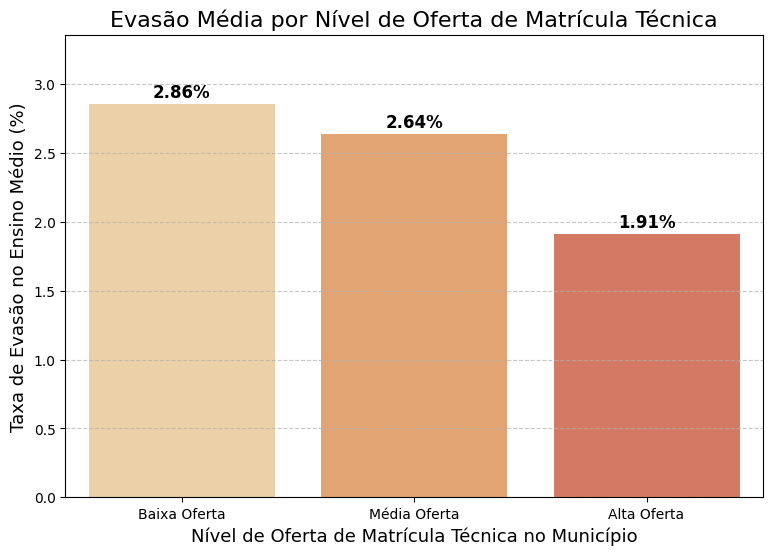

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_final['NIVEL_TECNICO'] = pd.qcut(
    df_final['mat_tec_2024'], 
    q=3, 
    labels=['Baixa Oferta', 'Média Oferta', 'Alta Oferta'],
    duplicates='drop' 
)

# 2. Calcula a Evasão Média para cada grupo
df_evasao_por_nivel = df_final.groupby('NIVEL_TECNICO')['evasao_pct_2024'].mean().reset_index()
df_evasao_por_nivel.rename(
    columns={'evasao_pct_2024': 'Evasão Média (%)'}, inplace=True
)

# 3. Cria o Gráfico de Barras
plt.figure(figsize=(9, 6))
sns.barplot(
    x='NIVEL_TECNICO', 
    y='Evasão Média (%)', 
    data=df_evasao_por_nivel,
    palette=['#f8d29b', '#f4a261', '#e76f51'] 
)

for index, row in df_evasao_por_nivel.iterrows():
    plt.text(
        index, 
        row['Evasão Média (%)'] + 0.05, 
        f"{row['Evasão Média (%)']:.2f}%", 
        color='black', 
        ha="center", 
        fontsize=12, 
        fontweight='bold'
    )

# Títulos
plt.title('Evasão Média por Nível de Oferta de Matrícula Técnica', fontsize=16)
plt.xlabel('Nível de Oferta de Matrícula Técnica no Município', fontsize=13)
plt.ylabel('Taxa de Evasão no Ensino Médio (%)', fontsize=13)
plt.ylim(0, df_evasao_por_nivel['Evasão Média (%)'].max() + 0.5) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_25564\1763645539.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_evasao_por_crime = df_crimes_extremos.groupby('NIVEL_CRIME')['evasao_pct_2024'].mean().reset_index()
C:\Users\carol\AppData\Local\Temp\ipykernel_25564\1763645539.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\carol\AppData\Local\Temp\ipykernel_25564\1763645539.py:21: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


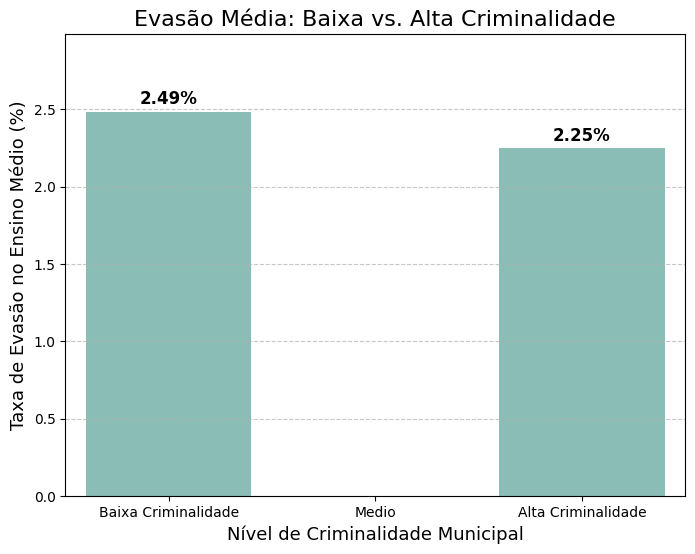

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_final['NIVEL_CRIME'] = pd.qcut(
    df_final['crimes_taxa_2024'],
    q=[0, 0.25, 0.75, 1],
    labels=['Baixa Criminalidade', 'Medio', 'Alta Criminalidade'],
    duplicates='drop'
)

df_crimes_extremos = df_final[df_final['NIVEL_CRIME'].isin(['Baixa Criminalidade', 'Alta Criminalidade'])].copy()

df_evasao_por_crime = df_crimes_extremos.groupby('NIVEL_CRIME')['evasao_pct_2024'].mean().reset_index()
df_evasao_por_crime.rename(
    columns={'evasao_pct_2024': 'Evasão Média (%)'}, inplace=True
)

plt.figure(figsize=(8, 6))
sns.barplot(
    x='NIVEL_CRIME',
    y='Evasão Média (%)',
    data=df_evasao_por_crime,
    palette=['#83c5be', '#006d77'] 
)


for index, row in df_evasao_por_crime.iterrows():
    plt.text(
        index,
        row['Evasão Média (%)'] + 0.05, 
        f"{row['Evasão Média (%)']:.2f}%",
        color='black',
        ha="center",
        fontsize=12,
        fontweight='bold'
    )


plt.title('Evasão Média: Baixa vs. Alta Criminalidade', fontsize=16)
plt.xlabel('Nível de Criminalidade Municipal', fontsize=13)
plt.ylabel('Taxa de Evasão no Ensino Médio (%)', fontsize=13)
plt.ylim(0, df_evasao_por_crime['Evasão Média (%)'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\carol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mapclassify\classifiers.py:1767: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


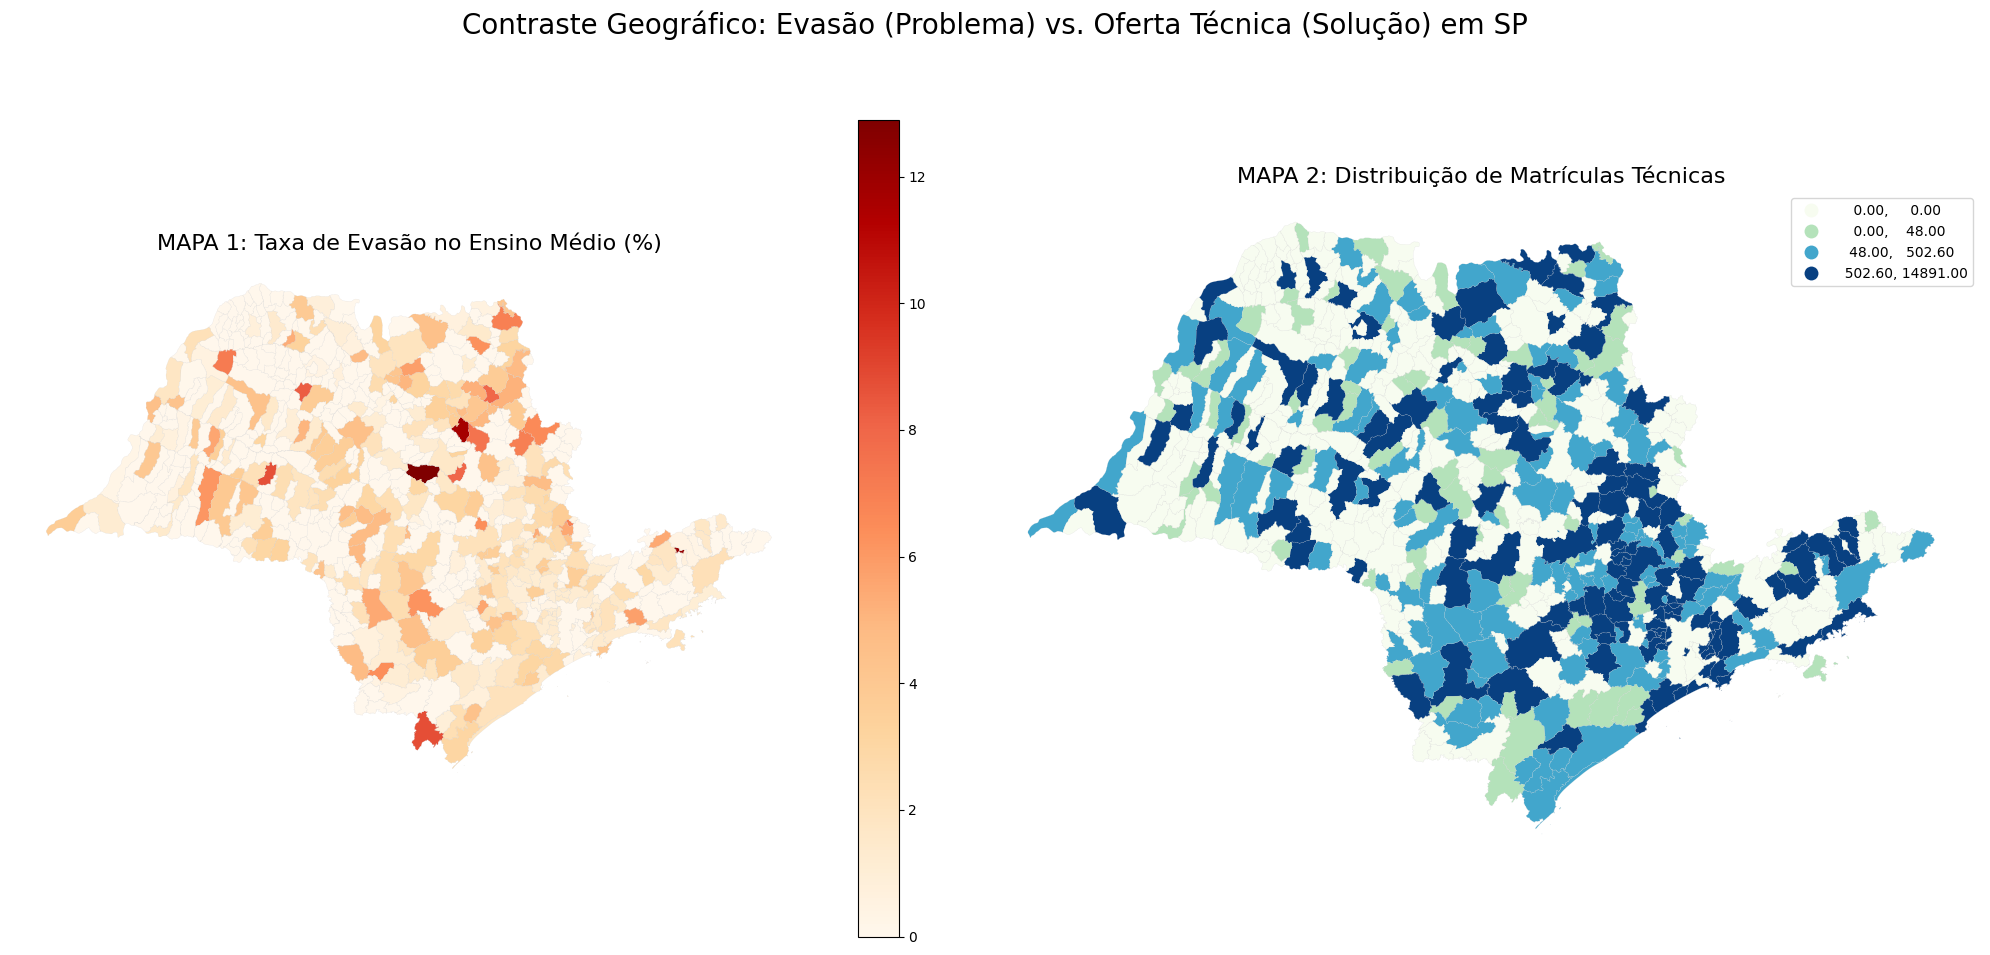

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

caminho_shp = r'C:\Users\carol\OneDrive\Documentos\evasaoEscolar\SP_Municipios\SP_Municipios_2024.shp' 


gdf_sp = gpd.read_file(caminho_shp)


gdf_sp.rename(columns={'CD_MUN': 'CO_MUNICIPIO'}, inplace=True) 

gdf_sp['CO_MUNICIPIO'] = pd.to_numeric(gdf_sp['CO_MUNICIPIO'], errors='coerce').astype('Int64')


gdf_final = gdf_sp.merge(df_final, on='CO_MUNICIPIO', how='left')

# Preenche com 0 para municípios sem dados na análise
gdf_final['Taxa de Evasão (%)'] = gdf_final['evasao_pct_2024'].fillna(0)
gdf_final['Matrículas Técnicas'] = gdf_final['mat_tec_2024'].fillna(0)


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

gdf_final.plot(
    column='Taxa de Evasão (%)',
    ax=axes[0],
    legend=True,
    cmap='OrRd', 
    edgecolor='0.8',
    linewidth=0.1
)
axes[0].set_title('MAPA 1: Taxa de Evasão no Ensino Médio (%)', fontsize=16)
axes[0].set_axis_off()

gdf_final.plot(
    column='Matrículas Técnicas',
    ax=axes[1],
    legend=True,
    cmap='GnBu', 
    edgecolor='0.8',
    linewidth=0.1,
    scheme='quantiles' 
)
axes[1].set_title('MAPA 2: Distribuição de Matrículas Técnicas', fontsize=16)
axes[1].set_axis_off()

plt.suptitle('Contraste Geográfico: Evasão (Problema) vs. Oferta Técnica (Solução) em SP', fontsize=20, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()